## This note book gives the trend of a single word in single mailing list.

In [2]:
%matplotlib inline

In [4]:
from bigbang.archive import Archive
import bigbang.parse as parse
import bigbang.graph as graph
import bigbang.mailman as mailman
import bigbang.process as process
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
import pytz
import numpy as np
import math
import nltk
from itertools import repeat
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
from nltk.corpus import stopwords
import re

In [5]:
urls = ["http://mail.scipy.org/pipermail/ipython-dev/"]#,
        #"http://mail.scipy.org/pipermail/ipython-user/"],
        #"http://mail.scipy.org/pipermail/scipy-dev/",
        #"http://mail.scipy.org/pipermail/scipy-user/",
        #"http://mail.scipy.org/pipermail/numpy-discussion/"]


archives= [Archive(url,archive_dir="../archives") for url in urls]

No data found at http://mail.scipy.org/pipermail/ipython-dev/. Attempting to collect data from URL.
This could take a while.
'Getting archive page for ipython-dev'
['2016-August.txt.gz',
 '2016-July.txt.gz',
 '2016-June.txt.gz',
 '2016-May.txt.gz',
 '2016-April.txt.gz',
 '2016-March.txt.gz',
 '2016-February.txt.gz',
 '2016-January.txt.gz',
 '2015-December.txt.gz',
 '2015-November.txt.gz',
 '2015-October.txt.gz',
 '2015-September.txt.gz',
 '2015-August.txt.gz',
 '2015-July.txt.gz',
 '2015-June.txt.gz',
 '2015-May.txt.gz',
 '2015-April.txt.gz',
 '2015-March.txt.gz',
 '2015-February.txt.gz',
 '2015-January.txt.gz',
 '2014-December.txt.gz',
 '2014-November.txt.gz',
 '2014-October.txt.gz',
 '2014-September.txt.gz',
 '2014-August.txt.gz',
 '2014-July.txt.gz',
 '2014-June.txt.gz',
 '2014-May.txt.gz',
 '2014-April.txt.gz',
 '2014-March.txt.gz',
 '2014-February.txt.gz',
 '2014-January.txt.gz',
 '2013-December.txt.gz',
 '2013-November.txt.gz',
 '2013-October.txt.gz',
 '2013-September.txt.gz',
 '

/Users/nick/code/mailing-list-analysis/bigbang/bigbang/archive.py:74: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.data.sort(columns='Date', inplace=True)


In [6]:
checkword = "python" #can change words, should be lower case

You'll need to download some resources for NLTK (the natural language toolkit) in order to do the kind of processing we want on all the mailing list text. In particular, for this notebook you'll need **punkt**, the Punkt Tokenizer Models.

To download, from an interactive Python shell, run:

    import nltk
    nltk.download()

And in the graphical UI that appears, choose "punkt" from the All Packages tab and Download.

In [8]:
df = pd.DataFrame(columns=["MessageId","Date","From","In-Reply-To","Count"])
for row in archives[0].data.iterrows():
    try: 
        w = row[1]["Body"].replace("'", "")
        k = re.sub(r'[^\w]', ' ', w)
        k = k.lower()
        t = nltk.tokenize.word_tokenize(k)
        subdict = {}
        count = 0
        for g in t:
            try:
                word = st.stem(g)
            except:
                print g
                pass
            if word == checkword:
                count += 1
        if count == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count
            df = df.append(subdict,ignore_index=True)
    except:
        if row[1]["Body"] is None: 
            print '!!! Detected an email with an empty Body field...'
        else: print 'error'

In [9]:
df[:5]  #dataframe of informations of the particular word.

,MessageId,Date,From,In-Reply-To,Count
0,<3E9E4094.7030802@colorado.edu>,2003-04-17 05:50:12,fperez@colorado.edu (Fernando Perez),<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,2.0
1,<3E9E4094.7030802@colorado.edu>,2003-04-17 05:50:12,fperez at colorado.edu (Fernando Perez),<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,2.0
2,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,2003-04-17 14:32:56,cdodt@fcoe.k12.ca.us (Cory Dodt),<3E9E4094.7030802@colorado.edu>,3.0
3,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,2003-04-17 14:32:56,cdodt at fcoe.k12.ca.us (Cory Dodt),<3E9E4094.7030802@colorado.edu>,3.0
4,<3E9EC1CA.3060800@colorado.edu>,2003-04-17 15:01:30,fperez@colorado.edu (Fernando Perez),<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,6.0


Group the dataframe by the month and year, and aggregate the counts for the checkword during each month to get a quick histogram of how frequently that word has been used over time.

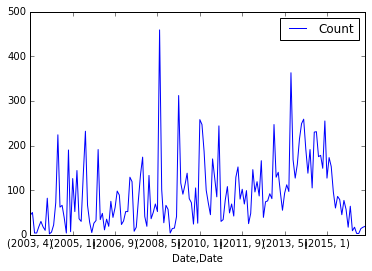

In [22]:
df.groupby([df.Date.dt.year, df.Date.dt.month]).agg({'Count':np.sum}).plot(y='Count')